<a href="https://colab.research.google.com/github/afroditifragiadaki/Clustering-EnergyConsumers/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset CC_LCL-FullData.csv

## Sampling

In [ ]:
# Load your dataset
file_path = '/content/drive/MyDrive/Dataset/CC_LCL-FullData.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Define your specific time periods
time_periods = [
    ('2013-12-01', '2013-12-14'),  # First two weeks of December 2013
    ('2013-10-01', '2013-10-14'),  # First two weeks of October 2013
    ('2013-04-01', '2013-04-14'),  # First two weeks of April 2013
    ('2013-07-01', '2013-07-14')   # First two weeks of July 2013
]

# Filter data for each period and concatenate
filtered_data_2013 = pd.concat([data[(data['DateTime'] >= pd.to_datetime(start)) & (data['DateTime'] <= pd.to_datetime(end))] for start, end in time_periods])

In [ ]:
# Saving the dfs in order to not perform the sampling every time
filtered_data_2013.to_csv('/content/drive/MyDrive/Dataset/sampled2013_data.csv' , index=False)

In [ ]:
# File path of your CSV file
file_path = '/content/drive/MyDrive/Dataset/CC_LCL-FullData.csv'

# Define your specific time periods
time_periods = [
    ('2012-12-01', '2012-12-14'),  # First two weeks of December 2012
    ('2012-10-01', '2012-10-14'),  # First two weeks of October 2012
    ('2012-04-01', '2012-04-14'),  # First two weeks of April 2012
    ('2012-07-01', '2012-07-14')   # First two weeks of July 2012
]

# Convert time periods to datetime
time_periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in time_periods]

# Initialize an empty DataFrame to store filtered data
filtered_data_2012 = pd.DataFrame()

# Set the chunk size
chunk_size = 1000000

# Function to check if a date falls within any of the specified time periods
def is_date_in_periods(date):
    return any(start <= date <= end for start, end in time_periods)

# Read the dataset in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size, parse_dates=['DateTime']):

    # Filter the chunk for dates that fall within the specified time periods
    filtered_chunk = chunk[chunk['DateTime'].apply(is_date_in_periods)]

    # Concatenate the filtered chunk to the final DataFrame
    filtered_data_2012 = pd.concat([filtered_data_2012, filtered_chunk])

    # Optional: print progress
    print(f"Processed a chunk, resulting DataFrame length: {len(filtered_data_2012)}")

# Output the filtered data or perform further analysis
print(filtered_data_2012.head())

Processed a chunk, resulting DataFrame length: 63711
Processed a chunk, resulting DataFrame length: 129328
Processed a chunk, resulting DataFrame length: 194314
Processed a chunk, resulting DataFrame length: 261757
Processed a chunk, resulting DataFrame length: 331476
Processed a chunk, resulting DataFrame length: 396412
Processed a chunk, resulting DataFrame length: 464569
Processed a chunk, resulting DataFrame length: 529885
Processed a chunk, resulting DataFrame length: 597938
Processed a chunk, resulting DataFrame length: 669665
Processed a chunk, resulting DataFrame length: 744267
Processed a chunk, resulting DataFrame length: 818930
Processed a chunk, resulting DataFrame length: 894880
Processed a chunk, resulting DataFrame length: 972987
Processed a chunk, resulting DataFrame length: 1050940
Processed a chunk, resulting DataFrame length: 1121979
Processed a chunk, resulting DataFrame length: 1183487
Processed a chunk, resulting DataFrame length: 1246480
Processed a chunk, result

In [ ]:
#
filtered_data_2012.to_csv('/content/drive/MyDrive/Dataset/sampled2012_data.csv' , index=False)

## Loading sampled datasets

In [91]:
# Read the data from 2012
sampled2012_df = pd.read_csv('/content/drive/MyDrive/Dataset/sampled2012_data.csv')

In [92]:
# Read the data from 2013
sampled2013_df = pd.read_csv('/content/drive/MyDrive/Dataset/sampled2013_data.csv', low_memory=False)

In [103]:
sampled2013copy_df=sampled2013_df

## Statistical Summary

In [ ]:
print("Data Shape:", sampled2013_df.shape)
print("Data Types:\n", sampled2012_df.shape)

Data Shape: (14126427, 4)
Data Types:
 (10247092, 4)


In [ ]:
print("Descriptive Statistics:\n", sampled2013_df.describe())

Descriptive Statistics:
             LCLid  stdorToU             DateTime KWH/hh (per half hour) 
count    14126427  14126427             14126427                14126427
unique       5418         2                 2690                    5445
top     MAC000002       Std  2013-04-02 22:00:00                      0 
freq         2688  11255088                 5404                  176302


# Missing Values

In [93]:
# Replace "Null" values with NaN
sampled2012_df['KWH/hh (per half hour) '] = sampled2012_df['KWH/hh (per half hour) '].replace('Null', np.nan)
sampled2013_df['KWH/hh (per half hour) '] = sampled2013_df['KWH/hh (per half hour) '].replace('Null', np.nan)

total_nan_count1 = sampled2012_df.isna().sum().sum()
total_nan_count2 = sampled2013_df.isna().sum().sum()

print(total_nan_count1)
print(total_nan_count2)

0
3


In [94]:
# Count unique households
num_households_2012 = sampled2012_df['LCLid'].nunique()
num_households_2013 = sampled2013_df['LCLid'].nunique()

print("Number of unique households of 2012:", num_households_2012)
print("Number of unique households of 2013:", num_households_2013)

#Same LCLid in both dfs
# unique households in each dataframe
unique_households_2012 = set(sampled2012_df['LCLid'].unique())
unique_households_2013 = set(sampled2013_df['LCLid'].unique())

# common households
common_households = unique_households_2012.intersection(unique_households_2013)

# Print the number of common households
print("Number of common households:", len(common_households))

# Filter sampled_df to include only common households
sampled2012_df = sampled2012_df[sampled2012_df['LCLid'].isin(common_households)]

# Filter sampled2013_df to include only common households
sampled2013_df = sampled2013_df[sampled2013_df['LCLid'].isin(common_households)]

Number of unique households of 2012: 5540
Number of unique households of 2013: 5418
Number of common households: 5402


# Normalization using **MinMaxScaler**

In [95]:
from sklearn.preprocessing import MinMaxScaler

# Function to normalize each group using MinMaxScaler
def normalize_group(group):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(group.values.reshape(-1, 1))
    return pd.Series(scaled_data.ravel(), index=group.index)  # Flatten to 1D and preserve index

# Apply the normalization to each group and replace the column for 2012 DataFrame
sampled2012_df['KWH/hh (per half hour) '] = sampled2012_df.groupby('LCLid')['KWH/hh (per half hour) '].transform(normalize_group)

# Apply the normalization to each group and replace the column for 2013 DataFrame
sampled2013_df['KWH/hh (per half hour) '] = sampled2013_df.groupby('LCLid')['KWH/hh (per half hour) '].transform(normalize_group)

# For the 2013 DataFrame copy, simply copy the already normalized DataFrame
sampled2013copy_df = sampled2013_df.copy()

# Normalization using **per day normalize**

In [10]:
sampled2012_df['DateTime'] = pd.to_datetime(sampled2012_df['DateTime'])
sampled2013_df['DateTime'] = pd.to_datetime(sampled2013_df['DateTime'])

def normalize_daily_consumption(df):
    # Convert 'KWH/hh (per half hour) ' to numeric, handling non-numeric entries
    df['KWH/hh (per half hour) '] = pd.to_numeric(df['KWH/hh (per half hour) '], errors='coerce')

    # Drop rows where 'KWH/hh (per half hour) ' is NaN after conversion
    df.dropna(subset=['KWH/hh (per half hour) '], inplace=True)

    # Extract date from 'DateTime'
    df['Date'] = df['DateTime'].dt.date

    # Group by household and date, then normalize directly in the original column
    df['KWH/hh (per half hour) '] = df.groupby(['LCLid', 'Date'])['KWH/hh (per half hour) '].transform(lambda x: x / x.max())

    # Optionally, drop the 'Date' column if it's no longer needed
    df.drop(columns=['Date'], inplace=True)

    return df

# Apply the normalization for 2012 DataFrame
sampled2012_df = normalize_daily_consumption(sampled2012_df)

# Apply the normalization for 2013 DataFrame
sampled2013_df = normalize_daily_consumption(sampled2013_df)

# For the 2013 DataFrame copy, you can simply copy the already normalized DataFrame
sampled2013copy_df = sampled2013_df.copy()

#Check

In [ ]:
print(sampled2013_df['KWH/hh (per half hour) '].mean())  # should be close to 0
print(sampled2013_df['KWH/hh (per half hour) '].std())  # should be close to 1

-1.0994940098318297e-17
0.9997957520919996


## ***Selected features calculation***

In [96]:
# Create features_df with common households as the index
features_df = pd.DataFrame(index=list(common_households))

In [97]:
# Sort features_df by the index 'LCLid' in  order
features_df.sort_index(ascending=True, inplace=True)

## 1. Median consumption



In [98]:
# Calculate the median consumption for each LCLid
median_consumption = sampled2013_df.groupby('LCLid')['KWH/hh (per half hour) '].median()

# Convert the result to a DataFrame
median_consumption_df = median_consumption.reset_index(name='Median_Consumption')

# Set 'LCLid' as the index
median_consumption_df.set_index('LCLid', inplace=True)

# Add the 'Median_Consumption' column to features_df
features_df = features_df.join(median_consumption_df)

## 2. Average Peak consumption

In [99]:
from scipy.signal import find_peaks

# Define a function to find peaks within a series and return a series with the same index and 1s where peaks were found
def find_and_mark_peaks(series):
    peaks, _ = find_peaks(series)
    is_peak_series = pd.Series(0, index=series.index)
    is_peak_series.iloc[peaks] = 1
    return is_peak_series

# Apply this function to each group in the DataFrame and assign the result to a new column
sampled2013_df['is_peak'] = sampled2013_df.groupby('LCLid', group_keys=False)['KWH/hh (per half hour) '].apply(find_and_mark_peaks)

sampled2013_df['is_peak'] = sampled2013_df['is_peak'].astype(bool)

# Calculate the average peak consumption for each household
avg_peak_consumption = sampled2013_df[sampled2013_df['is_peak']].groupby('LCLid')['KWH/hh (per half hour) '].median()

# Convert the result to a DataFrame
avg_peak_consumption_df = avg_peak_consumption.reset_index(name='avg_peak_consumption')

# Make sure that LCLid is the index in both dataframes
#features_df.set_index('LCLid', inplace=True)
avg_peak_consumption_df.set_index('LCLid', inplace=True)

# Merge the dataframes on the index (LCLid)
features_df = features_df.join(avg_peak_consumption_df)

## 3.  Peak frequency in each time slot

In [100]:
# Set 'DateTime' as the index and convert to datetime format
sampled2013_df.set_index('DateTime', inplace=True)
sampled2013_df.index = pd.to_datetime(sampled2013_df.index)

# Extract the time from the 'DateTime' field and create a new column 'time_slot'
sampled2013_df['time_slot'] = sampled2013_df.index.time

# Group by 'LCLid' and 'time_slot', and count the number of peaks
grouped_peak_df = sampled2013_df.groupby(['LCLid', 'time_slot'])['is_peak'].sum().reset_index(name='peak_count')

# Group by 'LCLid' and count the total number of records (values)
total_counts_per_household = sampled2013_df.groupby('LCLid').size().reset_index(name='total_count')

# Merge the dataframes to associate peak_counts with total_counts
merged_df = pd.merge(grouped_peak_df, total_counts_per_household, on='LCLid', how='left')

# Calculate the time slot frequency
merged_df['time_slot_freq'] = merged_df['peak_count'] / merged_df['total_count']

# Pivot the DataFrame to create the matrix
peaks_matrix = merged_df.pivot(index='LCLid', columns='time_slot', values='time_slot_freq')

# Replace NaNs with zeros
peaks_matrix.fillna(0, inplace=True)

In [101]:
# Assuming features_df is already defined and has 'LCLid' as its index
features_df = features_df.join(peaks_matrix, how='left')

# Fill any NaNs that might arise after joining, in case some LCLids were missing in peaks_matrix
features_df.fillna(0, inplace=True)

## 4. Average number of Peaks per day

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
# Calculate the total number of days for each household
sampled2013_df['date'] = sampled2013_df.index.date
num_days = sampled2013_df.groupby('LCLid')['date'].nunique()

# Calculate the total number of peaks for each household
num_peaks = sampled2013_df[sampled2013_df['is_peak']].groupby('LCLid').size()

# Calculate the average number of peaks per day
avg_peaks_per_day = num_peaks / num_days

# Add the 'avg_peaks_per_day' to the 'features_df' dataframe
features_df = features_df.join(avg_peaks_per_day.rename('avg_peaks_per_day'))

# Instantiate the scaler
scaler = StandardScaler()

# Scale the 'avg_peaks_per_day' column and assign it back
features_df['avg_peaks_per_day'] = scaler.fit_transform(features_df[['avg_peaks_per_day']])

## 5. Consumption standard deviation

In [104]:
# Calculate standard deviation of consumption for each household
consumption_std = sampled2013_df.groupby('LCLid')['KWH/hh (per half hour) '].std()

# Add the 'consumption_std' to the 'features_df' dataframe
features_df = features_df.join(consumption_std.rename('consumption_std'))

## 6. Average **morning** Consumption / 7. Average **afternoon** Consumption /
## 8. Average **evening** Consumption / 9. Average **night** Consumption

In [105]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Add a new 'Time_of_Day' column
sampled2013_df['Time_of_Day'] = [time_of_day(h) for h in sampled2013_df.index.hour]

# Calculate the average consumption during each part of the day for each household
average_consumption_time_of_day = sampled2013_df.groupby(['LCLid', 'Time_of_Day'])['KWH/hh (per half hour) '].median().unstack()

# Add these new features to features_df
features_df = features_df.join(average_consumption_time_of_day)

## 10. Average **Winter** Consumption / 11.Average **Autumn** consumption
## 12. Average **Spring** Consumption / 13. Average **Summer** Consumption


In [106]:
# Define a function to map months to seasons
def season(month):
    if month in [12]:
        return 'Winter'
    elif month in [4]:
        return 'Spring'
    elif month in [7]:
        return 'Summer'
    else:
        return 'Autumn'

# Add a new 'Season' column
sampled2013_df['Season'] = [season(m) for m in sampled2013_df.index.month]


#sampled2013copy_df.set_index('DateTime', inplace=True)
sampled2013copy_df.index = pd.to_datetime(sampled2013copy_df.index)
sampled2013copy_df['Season']  = [season(m) for m in sampled2013copy_df.index.month]

In [107]:
# Group by 'LCLid' and 'Season' and count the number of records
season_counts = sampled2013_df.groupby(['LCLid', 'Season']).size().unstack()

# Reset the index for filtering
season_counts.reset_index(inplace=True)

# Filter households which do not have data in one or more seasons
missing_season_households = season_counts[season_counts.isnull().any(axis=1)]['LCLid']

num_households = missing_season_households.shape[0]
print(f'The number of households that lack values in one or more seasons is: {num_households}')

The number of households that lack values in one or more seasons is: 288


In [108]:
# Remove the households that are missing data in one or more seasons
features_df = features_df.drop(missing_season_households)
#features_df = features_df.drop(missing_season_households, errors='ignore')

In [109]:
# Calculate the average consumption during each season for each household
average_consumption_season = sampled2013_df.groupby(['LCLid', 'Season'])['KWH/hh (per half hour) '].median().unstack()

# Add these new features to features_df
features_df = features_df.join(average_consumption_season)

## 14. Average Peak-hours usage / 15.Average off-peak-hours usage

In [110]:
# Define peak hours as between 16:00 and 20:00
sampled2013_df['Is_Peak_Hour'] = (16 <= sampled2013_df.index.hour) & (sampled2013_df.index.hour <= 20)

# Group by 'LCLid' and 'Is_Peak_Hour', then calculate the mean of 'KWH/hh (per half hour) '
average_usage_peak_non_peak = sampled2013_df.groupby(['LCLid', 'Is_Peak_Hour'])['KWH/hh (per half hour) '].median().unstack()

# Rename columns for clarity
average_usage_peak_non_peak.rename(columns={True: 'Peak_Hours', False: 'Non_Peak_Hours'}, inplace=True)

# Add these new features to features_df using join
features_df = features_df.join(average_usage_peak_non_peak)

## 16. Average weekday usage / 17. Average weekend usage

In [111]:
# Create a new column 'is_weekend' which is True if the day of the week is a Saturday or Sunday, and False otherwise
sampled2013_df['is_weekend'] = sampled2013_df.index.weekday > 4


sampled2013copy_df['is_weeknd'] = sampled2013copy_df.index.weekday > 4

# Calculate the average usage for weekdays and weekends
average_usage_weekday_weekend = sampled2013_df.groupby(['LCLid', 'is_weekend'])['KWH/hh (per half hour) '].median().unstack()

# Rename the columns
average_usage_weekday_weekend.columns = ['Avg_Weekday_Usage', 'Avg_Weekend_Usage']

# Merge features_df and average_usage_weekday_weekend
features_df = features_df.join(average_usage_weekday_weekend)

In [112]:
# Setting 'DateTime' as the index and converting it to datetime object
sampled2013copy_df = sampled2013copy_df.reset_index(drop=False)
sampled2013copy_df['DateTime'] = pd.to_datetime(sampled2013copy_df['DateTime'])
sampled2013copy_df.set_index('DateTime', inplace=True)

# Adding 'Weekday' column
sampled2013copy_df['Weekday'] = sampled2013copy_df.index.weekday > 4

## 18. Usage trend

In [113]:
from sklearn.linear_model import LinearRegression

# Create 'DayOfYear' column
sampled2013_df['DayOfYear'] = sampled2013_df.index.dayofyear

# Calculate daily usage for each household
daily_usage_df = sampled2013_df.groupby(['LCLid', 'DayOfYear', 'Season'])['KWH/hh (per half hour) '].sum().reset_index()

# Group the DataFrame by 'LCLid' and 'Season'
grouped_df = daily_usage_df.groupby(['LCLid', 'Season'])

def get_slope(df):
    # Initialize a linear regression model
    model = LinearRegression()

    # Reshape the DayOfYear values to 2D array for the fit method
    X = df['DayOfYear'].values.reshape(-1, 1)
    y = df['KWH/hh (per half hour) ']

    # Fit the model
    model.fit(X, y)

    # Return the slope of the regression line
    return model.coef_[0]

# Apply the get_slope function to each group
usage_trends = grouped_df.apply(get_slope).unstack()

# Rename the columns
usage_trends.columns = ['Autumn_Usage_Trend', 'Spring_Usage_Trend', 'Summer_Usage_Trend', 'Winter_Usage_Trend']

# Join the dataframes on 'LCLid'
features_df = features_df.join(usage_trends)


## 20. Autocorrelation 7 days / 21. Autocorrelation 1 day

In [114]:
# Calculate the autocorrelation for each household with a lag of 7 days (336 half-hour periods)
autocorr_7d = sampled2013_df.groupby('LCLid')['KWH/hh (per half hour) '].apply(lambda x: x.autocorr(lag=336))

# Add this to features_df using join
features_df = features_df.join(autocorr_7d.rename('Autocorrelation_7d'))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [115]:
num_nan_autocorr = features_df['Autocorrelation_7d'].isnull().sum()
print(f"Number of households with NaN in Autocorrelation_7d: {num_nan_autocorr}")

Number of households with NaN in Autocorrelation_7d: 4


In [116]:
# Calculate the autocorrelation for each household with a lag of 24 hrs
autocorr_1d = sampled2013_df.groupby('LCLid')['KWH/hh (per half hour) '].apply(lambda x: x.autocorr(lag=48))

# Add this to features_df
features_df = features_df.join(autocorr_1d.rename('Autocorrelation_1d'))

## 22. Consumption growth

In [117]:
# Calculate the average consumption for each household in 2012 and 2013
avg_consumption_2012 = sampled2012_df.groupby('LCLid')['KWH/hh (per half hour) '].median()
avg_consumption_2013 = sampled2013_df.groupby('LCLid')['KWH/hh (per half hour) '].median()

# Calculate the consumption growth from 2012 to 2013
consumption_growth = avg_consumption_2013 - avg_consumption_2012

# Add this to features_df
features_df['Consumption_Growth'] = consumption_growth

# Fill NaN values with the median consumption growth
features_df['Consumption_Growth'].fillna(features_df['Consumption_Growth'].median(), inplace=True)

## 23. Variability in peak-usage times

In [118]:
# First, get the times when there's a peak consumption for each household and create a separate copy
peak_times_df = sampled2013_df[sampled2013_df['is_peak']].copy()

# Convert the 'time_slot' to seconds for numerical computation
def time_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

peak_times_df['time_in_seconds'] = peak_times_df['time_slot'].apply(time_to_seconds)

# Now, calculate the standard deviation of these times for each household
time_variability = peak_times_df.groupby('LCLid')['time_in_seconds'].std().rename('time_variability')

In [119]:
# Join the calculated time variability with the features_df
features_df = features_df.join(time_variability)

# If any household doesn't have enough peak data to compute standard deviation, fill NaN values with 0
features_df['time_variability'].fillna(0, inplace=True)

In [120]:
mean_time_variability = features_df['time_variability'].median()
std_time_variability = features_df['time_variability'].std()

features_df['time_variability'] = (features_df['time_variability'] - mean_time_variability) / std_time_variability

In [121]:
# Drop rows where any column contains a NaN value
features_df.dropna(inplace=True)

# Print the number of households left after removing NaNs
num_households = features_df.shape[0]
print(f"Final number of households: {num_households}")

Final number of households: 5110


## Correlation Analysis of the features


In [34]:
#correlation_matrix = features_df.corr() #using Pearson correlation

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(20, 16))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Heatmap of Feature Correlation')  #
#plt.show()

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1>Clustering Algorithms</h1>
</div>

In [123]:
features_df.columns = [str(col) for col in features_df.columns]

**Usage trend feature transformation ***

In [124]:
# For each season
for season in ['Autumn_Usage_Trend', 'Spring_Usage_Trend', 'Summer_Usage_Trend', 'Winter_Usage_Trend']:
    # Create new sine and cosine columns
    features_df[season+'_sin'] = np.sin(features_df[season])
    features_df[season+'_cos'] = np.cos(features_df[season])

    # Drop the original columns
    features_df.drop(season, axis=1, inplace=True)

What if we normalize first?

In [122]:
# List of columns to be dropped
columns_to_drop = [ 'avg_peaks_per_day']

# Dropping the specified columns
features_df = features_df.drop(columns=columns_to_drop)

In [39]:
columns_to_drop = ['Median_Consumption','Autumn', 'Spring', 'Summer', 'Winter']
features_df = features_df.drop(columns=columns_to_drop)

In [125]:
scaled_df=features_df

Dunn Index

In [38]:
from scipy.spatial.distance import cdist
from itertools import combinations

def dunn(data, labels):
    unique_labels = np.unique(labels)

    # Compute inter-cluster distances
    min_intercluster_distance = float('inf')
    for cluster_i, cluster_j in combinations(unique_labels, 2):
        data_i = data[labels == cluster_i].to_numpy()
        data_j = data[labels == cluster_j].to_numpy()
        distances = cdist(data_i, data_j, 'euclidean')
        min_distance = distances.min()
        if min_distance < min_intercluster_distance:
            min_intercluster_distance = min_distance

    # Compute intra-cluster diameters
    max_intracluster_diameter = 0
    for cluster in unique_labels:
        data_cluster = data[labels == cluster].to_numpy()
        distances = cdist(data_cluster, data_cluster, 'euclidean')
        max_distance = distances.max()
        if max_distance > max_intracluster_diameter:
            max_intracluster_diameter = max_distance

    return min_intercluster_distance / max_intracluster_diameter

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1>1.K-Means ++ </h1>
</div>

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [126]:
# Define the range of clusters
cluster_range = range(3, 10)

# Store evaluation metrics
metrics_kmeanspp = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster labels for each number of clusters
labels_kmeanspp = {}

# Store cluster centroids for each number of clusters
centroids_kmeanspp = {}

# For each number of clusters, fit KMeans++ and calculate metrics
for n_clusters in cluster_range:
    kmeans_plusplus = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=20)
    kmeans_plusplus.fit(scaled_df)
    cluster_assignments_plusplus = kmeans_plusplus.labels_

    # Store labels
    labels_kmeanspp[n_clusters] = cluster_assignments_plusplus

    # Store centroids
    centroids_kmeanspp[n_clusters] = kmeans_plusplus.cluster_centers_

    silhouette_plusplus = silhouette_score(scaled_df, cluster_assignments_plusplus)
    db_score_plusplus = davies_bouldin_score(scaled_df, cluster_assignments_plusplus)
    ch_score_plusplus = calinski_harabasz_score(scaled_df, cluster_assignments_plusplus)
    dunn_plusplus = dunn(scaled_df, cluster_assignments_plusplus)

    metrics_kmeanspp["Number of Clusters"].append(n_clusters)
    metrics_kmeanspp["Silhouette Score"].append(silhouette_plusplus)
    metrics_kmeanspp["Davies-Bouldin Score"].append(db_score_plusplus)
    metrics_kmeanspp["Calinski-Harabasz Score"].append(ch_score_plusplus)
    metrics_kmeanspp["Dunn Index"].append(dunn_plusplus)

# Convert results to DataFrame for better visualization
metrics_kmeanspp_df = pd.DataFrame(metrics_kmeanspp)

3D visualisation using 3 features

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_clusters(data, labels):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Define columns for visualization
    x_column = data.columns[0]
    y_column = data.columns[1]
    z_column = 'Consumption_Growth'

    scatter = ax.scatter(data[x_column],       # x
                         data[y_column],       # y
                         data[z_column],       # z
                         c=labels,             # colors for each cluster
                         cmap='rainbow',
                         s=60)

    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_zlabel(z_column)
    ax.set_title("3D Cluster Visualization")

    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Clusters")
    ax.add_artist(legend1)

    plt.show()

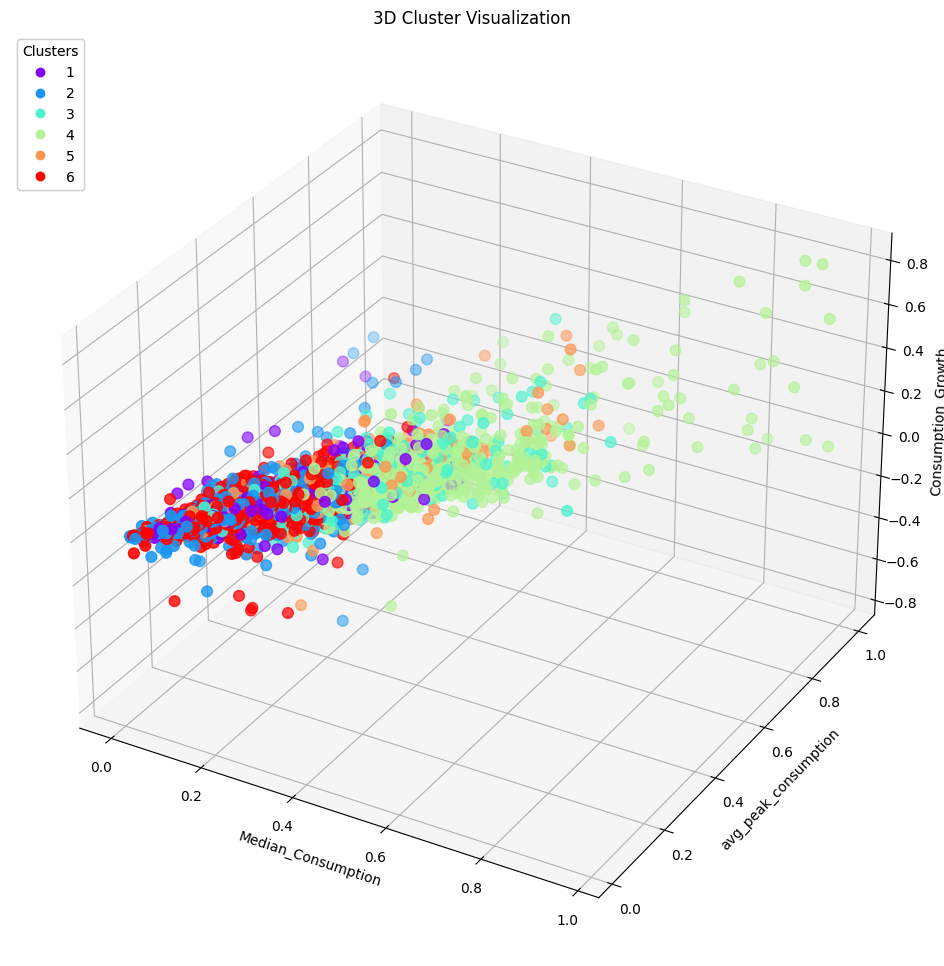

In [56]:
# Retrieve labels for a specific cluster count (7 clusters)
cluster_labels = labels_kmeanspp[6]
plot_3d_clusters(scaled_df, cluster_labels+1)

T-SNE for visualization

In [128]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
tsne_result = tsne.fit_transform(scaled_df)

# Convert to a DataFrame for convenience
tsne_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])

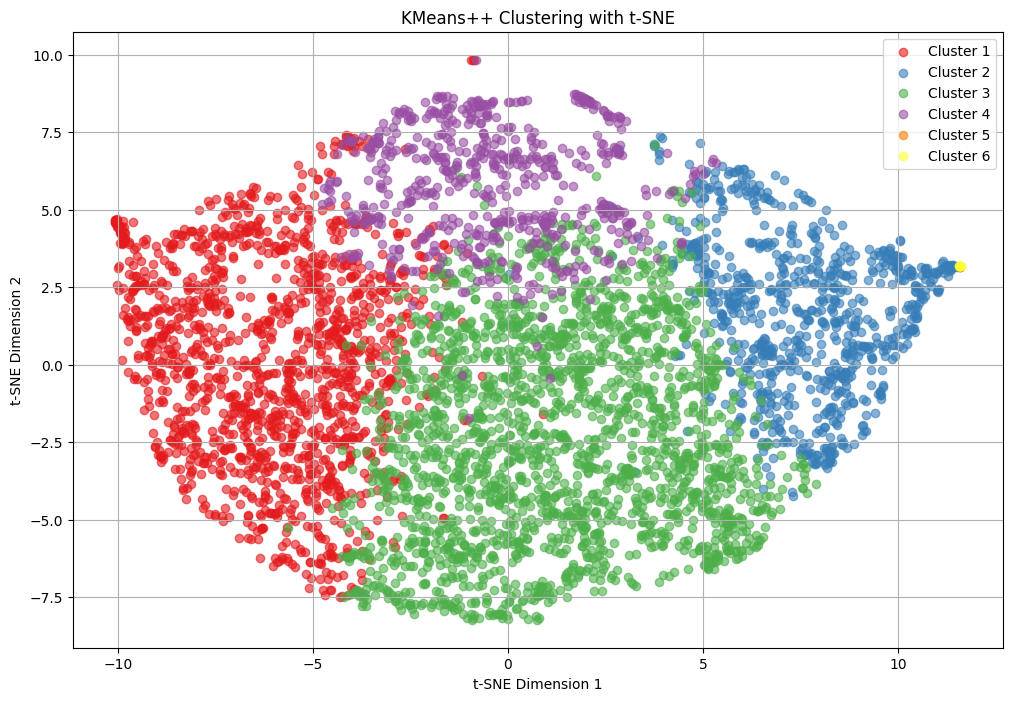

In [129]:
# Define the color palette
palette = sns.color_palette("Set1", n_colors=len(np.unique(labels_kmeanspp[6])))

# Add the KMeans++ labels to the t-SNE DataFrame for plotting
tsne_df['Cluster_KMeans++'] = labels_kmeanspp[6]

plt.figure(figsize=(12, 8))
for cluster_num, color in zip(np.unique(labels_kmeanspp[6]), palette):
    cluster_data = tsne_result[labels_kmeanspp[6] == cluster_num]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_num+1}', alpha=0.6, color=color)

plt.title('KMeans++ Clustering with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

PCA for visualisation

In [130]:
from sklearn.decomposition import PCA

# Apply PCA to scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Convert to a DataFrame for convenience
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

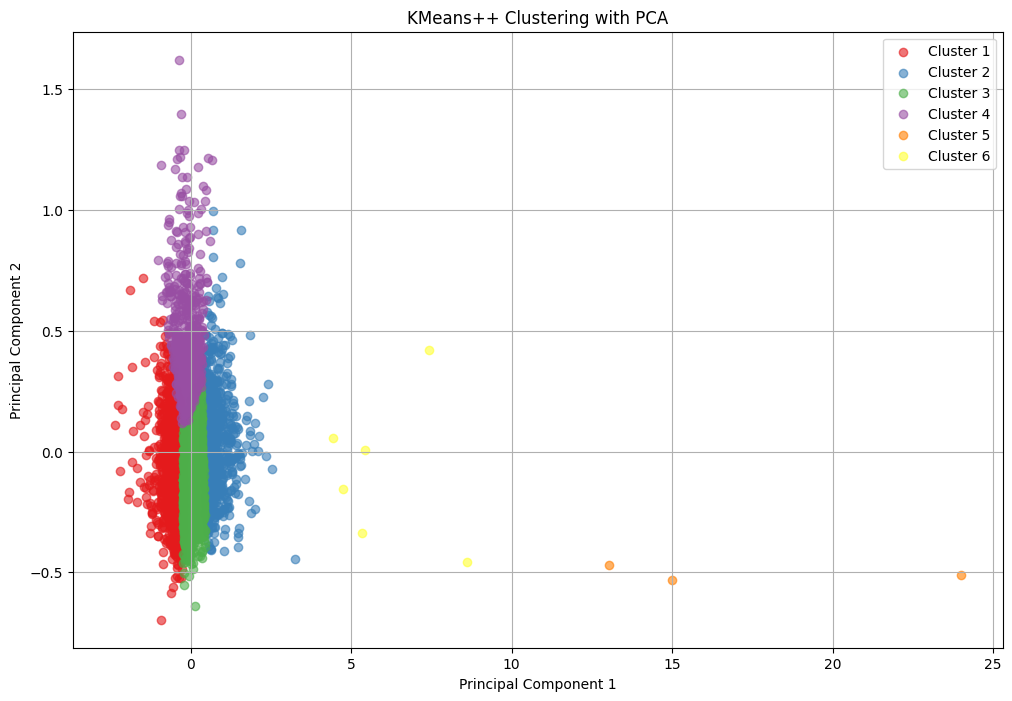

In [131]:
# Define the color palette
palette = sns.color_palette("Set1", n_colors=len(np.unique(labels_kmeanspp[6])))

# Attach the KMeans++ labels for 6 clusters to the pca_df
pca_df['Cluster_KMeans++'] = labels_kmeanspp[6]

plt.figure(figsize=(12, 8))
for cluster_num, color in zip(np.unique(labels_kmeanspp[6]), palette):
    cluster_data = pca_result[labels_kmeanspp[6] == cluster_num]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_num+1}', alpha=0.6, color=color)

plt.title('KMeans++ Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1>2. Fuzzy K - Means </h1>
</div>

In [132]:
!pip install scikit-fuzzy
import skfuzzy as fuzz

In [133]:
# Define the range of clusters
cluster_range = range(3, 10)

# Store evaluation metrics
metrics_fuzzycmeans = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster memberships for each number of clusters
memberships_fuzzycmeans = {}

# For each number of clusters, fit Fuzzy C-Means and calculate metrics
for n_clusters in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(scaled_df.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

    # Get the cluster labels: data points have the highest membership to are their label
    cluster_assignments_fuzzy = np.argmax(u, axis=0)

    # Store memberships
    memberships_fuzzycmeans[n_clusters] = u

    silhouette_fuzzy = silhouette_score(scaled_df, cluster_assignments_fuzzy)
    db_score_fuzzy = davies_bouldin_score(scaled_df, cluster_assignments_fuzzy)
    ch_score_fuzzy = calinski_harabasz_score(scaled_df, cluster_assignments_fuzzy)
    dunn_fuzzy = dunn(scaled_df, cluster_assignments_fuzzy)

    metrics_fuzzycmeans["Number of Clusters"].append(n_clusters)
    metrics_fuzzycmeans["Silhouette Score"].append(silhouette_fuzzy)
    metrics_fuzzycmeans["Davies-Bouldin Score"].append(db_score_fuzzy)
    metrics_fuzzycmeans["Calinski-Harabasz Score"].append(ch_score_fuzzy)
    metrics_fuzzycmeans["Dunn Index"].append(dunn_fuzzy)

# Convert results to DataFrame for better visualization
metrics_fuzzycmeans_df = pd.DataFrame(metrics_fuzzycmeans)

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1>3. Hierarchical clustering </h1>
</div>

In [134]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# 1. Hierarchical clustering using Ward method
cluster_range = range(3, 10)

# Store evaluation metrics
metrics_hierarchical_ward = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster labels for each number of clusters
labels_hierarchical_ward = {}

# For each number of clusters, fit hierarchical clustering (Ward method) and calculate metrics
for n_clusters in cluster_range:
    hierarchical_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_assignments_hierarchical = hierarchical_ward.fit_predict(scaled_df)

    # Store labels
    labels_hierarchical_ward[n_clusters] = cluster_assignments_hierarchical

    silhouette_hierarchical = silhouette_score(scaled_df, cluster_assignments_hierarchical)
    db_score_hierarchical = davies_bouldin_score(scaled_df, cluster_assignments_hierarchical)
    ch_score_hierarchical = calinski_harabasz_score(scaled_df, cluster_assignments_hierarchical)
    dunn_hierarchical = dunn(scaled_df, cluster_assignments_hierarchical)

    metrics_hierarchical_ward["Number of Clusters"].append(n_clusters)
    metrics_hierarchical_ward["Silhouette Score"].append(silhouette_hierarchical)
    metrics_hierarchical_ward["Davies-Bouldin Score"].append(db_score_hierarchical)
    metrics_hierarchical_ward["Calinski-Harabasz Score"].append(ch_score_hierarchical)
    metrics_hierarchical_ward["Dunn Index"].append(dunn_hierarchical)

# Convert results to DataFrame for better visualization
metrics_hierarchical_ward_df = pd.DataFrame(metrics_hierarchical_ward)

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1>4. SOMs </h1>
</div>

In [135]:
pip install minisom

In [136]:
from minisom import MiniSom

cluster_range = range(3, 10)

# Store evaluation metrics
metrics_som = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster labels for each configuration
labels_som = {}

# Define a function to generate a SOM with the given shape
def train_som(som_shape, data):
    som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.9, learning_rate=1)
    som.train_random(data.values, 1000)
    winner_coordinates = np.array([som.winner(x) for x in data.values]).T
    som_cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
    return som_cluster_index

# For each configuration in the cluster range, fit SOM and calculate metrics
for n_clusters in cluster_range:
    som_shape = (n_clusters, 1)  # Adjust this shape if you have a better configuration in mind
    som_cluster_index = train_som(som_shape, scaled_df)

    # Store labels
    labels_som[n_clusters] = som_cluster_index

    silhouette_som = silhouette_score(scaled_df, som_cluster_index)
    db_score_som = davies_bouldin_score(scaled_df, som_cluster_index)
    ch_score_som = calinski_harabasz_score(scaled_df, som_cluster_index)
    dunn_som = dunn(scaled_df, som_cluster_index)

    metrics_som["Number of Clusters"].append(n_clusters)
    metrics_som["Silhouette Score"].append(silhouette_som)
    metrics_som["Davies-Bouldin Score"].append(db_score_som)
    metrics_som["Calinski-Harabasz Score"].append(ch_score_som)
    metrics_som["Dunn Index"].append(dunn_som)

# Convert results to DataFrame for better visualization
metrics_som_df = pd.DataFrame(metrics_som)

A U-matrix (Unified Distance Matrix), which displays the distances between neurons in the grid, helping to visualize the cluster boundaries.

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1>5. BIRCH </h1>
</div>

In [137]:
from sklearn.cluster import Birch

# Define the range of clusters
cluster_range = range(3, 10)

# Store evaluation metrics
metrics_birch = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster labels for each number of clusters
labels_birch = {}

# For each number of clusters, fit BIRCH and calculate metrics
for n_clusters in cluster_range:
    birch = Birch(n_clusters=n_clusters, threshold=0.5, branching_factor=50)
    cluster_assignments_birch = birch.fit_predict(scaled_df)

    # Store labels
    labels_birch[n_clusters] = cluster_assignments_birch

    silhouette_birch = silhouette_score(scaled_df, cluster_assignments_birch)
    db_score_birch = davies_bouldin_score(scaled_df, cluster_assignments_birch)
    ch_score_birch = calinski_harabasz_score(scaled_df, cluster_assignments_birch)
    dunn_birch = dunn(scaled_df, cluster_assignments_birch)

    metrics_birch["Number of Clusters"].append(n_clusters)
    metrics_birch["Silhouette Score"].append(silhouette_birch)
    metrics_birch["Davies-Bouldin Score"].append(db_score_birch)
    metrics_birch["Calinski-Harabasz Score"].append(ch_score_birch)
    metrics_birch["Dunn Index"].append(dunn_birch)

# Convert results to DataFrame for better visualization
metrics_birch_df = pd.DataFrame(metrics_birch)

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1> 6. Gaussian Mixture Models (GMMs) </h1>
</div>

In [138]:
from sklearn.mixture import GaussianMixture

# Define the range of clusters
cluster_range = range(3, 10)

# Store evaluation metrics
metrics_gmm = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster labels for each number of clusters
labels_gmm = {}

# For each number of clusters, fit GMM and calculate metrics
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(scaled_df)
    cluster_assignments_gmm = gmm.predict(scaled_df)

    # Store labels
    labels_gmm[n_clusters] = cluster_assignments_gmm

    silhouette_gmm = silhouette_score(scaled_df, cluster_assignments_gmm)
    db_score_gmm = davies_bouldin_score(scaled_df, cluster_assignments_gmm)
    ch_score_gmm = calinski_harabasz_score(scaled_df, cluster_assignments_gmm)
    dunn_gmm = dunn(scaled_df, cluster_assignments_gmm)

    metrics_gmm["Number of Clusters"].append(n_clusters)
    metrics_gmm["Silhouette Score"].append(silhouette_gmm)
    metrics_gmm["Davies-Bouldin Score"].append(db_score_gmm)
    metrics_gmm["Calinski-Harabasz Score"].append(ch_score_gmm)
    metrics_gmm["Dunn Index"].append(dunn_gmm)

# Convert results to DataFrame for better visualization
metrics_gmm_df = pd.DataFrame(metrics_gmm)

# t-SNE Visualization for GMM with the optimal number of clusters (based on Silhouette score)
optimal_clusters = metrics_gmm_df["Number of Clusters"].iloc[metrics_gmm_df['Silhouette Score'].idxmax()]

<div style="text-align: center; color: #0000FF; font-family: 'Arial', sans-serif; border-bottom: 2px solid #666; padding-bottom: 10px; margin-bottom: 20px;">
    <h1> 7. Spectral Clustering </h1>
</div>

In [139]:
from sklearn.cluster import SpectralClustering
# Define the range of clusters
cluster_range = range(3, 10)

# Store evaluation metrics
metrics_spectral = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster labels for each number of clusters
labels_spectral = {}

# For each number of clusters, fit spectral clustering and calculate metrics
for n_clusters in cluster_range:
    spectral = SpectralClustering(n_clusters=n_clusters,
                                  affinity='nearest_neighbors',
                                  n_neighbors=15,
                                  assign_labels="kmeans",
                                  random_state=42)
    cluster_assignments_spectral = spectral.fit_predict(scaled_df)

    # Store labels
    labels_spectral[n_clusters] = cluster_assignments_spectral

    silhouette_spec = silhouette_score(scaled_df, cluster_assignments_spectral)
    db_score_spec = davies_bouldin_score(scaled_df, cluster_assignments_spectral)
    ch_score_spec = calinski_harabasz_score(scaled_df, cluster_assignments_spectral)
    dunn_spec = dunn(scaled_df, cluster_assignments_spectral)

    metrics_spectral["Number of Clusters"].append(n_clusters)
    metrics_spectral["Silhouette Score"].append(silhouette_spec)
    metrics_spectral["Davies-Bouldin Score"].append(db_score_spec)
    metrics_spectral["Calinski-Harabasz Score"].append(ch_score_spec)
    metrics_spectral["Dunn Index"].append(dunn_spec)

# Convert results to DataFrame for better visualization
metrics_spectral_df = pd.DataFrame(metrics_spectral)

## 8. ENSEMBLE CLUSTERING

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import squareform, cdist
import numpy as np
import pandas as pd
from itertools import combinations

# Define the range of clusters
cluster_range = range(3, 10)

# Store evaluation metrics for ensemble clustering
ensemble_metrics = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": [],
    "Dunn Index": []
}

# Store cluster labels for each number of clusters in ensemble
ensemble_labels = {}

# For each number of clusters, perform ensemble clustering and calculate metrics
for num_clusters in cluster_range:
    n = scaled_df.shape[0]  # Number of data points

    # Initialize the co-association matrix
    co_association_matrix = np.zeros((n, n))

    # Update co-association matrix for each clustering algorithm
    for labels in [labels_kmeanspp[num_clusters], labels_hierarchical_ward[num_clusters], labels_birch[num_clusters]]:
        for i in range(n):
            for j in range(n):
                if labels[i] == labels[j]:
                    co_association_matrix[i, j] += 1

    # Normalize the co-association matrix
    co_association_matrix /= 3  # Number of clustering results

    # Convert co-association matrix to a distance matrix
    distance_matrix = 1 - co_association_matrix

    # Convert to condensed distance matrix required by the linkage function
    condensed_distance_matrix = squareform(distance_matrix, checks=False)

    # Hierarchical clustering on the condensed distance matrix
    Z = linkage(condensed_distance_matrix, 'average')

    # Obtain labels
    cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

    # Store labels
    ensemble_labels[num_clusters] = cluster_labels

    # Calculate metrics
    silhouette = silhouette_score(scaled_df, cluster_labels)
    db_score = davies_bouldin_score(scaled_df, cluster_labels)
    ch_score = calinski_harabasz_score(scaled_df, cluster_labels)
    dunn_index = dunn(scaled_df, cluster_labels)

    # Append metrics
    ensemble_metrics["Number of Clusters"].append(num_clusters)
    ensemble_metrics["Silhouette Score"].append(silhouette)
    ensemble_metrics["Davies-Bouldin Score"].append(db_score)
    ensemble_metrics["Calinski-Harabasz Score"].append(ch_score)
    ensemble_metrics["Dunn Index"].append(dunn_index)

ensemble_metrics_df = pd.DataFrame(ensemble_metrics)

## PERFORMANCE EVALUATION

In [164]:
clusters_test=9

labels = {
    "K-Means++": labels_kmeanspp[clusters_test],
    "Fuzzy C-means": np.argmax(memberships_fuzzycmeans[clusters_test], axis=0),
    "Hierarchical (Ward)": labels_hierarchical_ward[clusters_test],
    "SOMs": labels_som[clusters_test],
    "BIRCH": labels_birch[clusters_test],
    "GMMs": labels_gmm[clusters_test],
    "Spectral Clustering": labels_spectral[clusters_test],
    "Ensemble Clustering": ensemble_labels[clusters_test]
}


# Define metric functions
metric_functions = {
    "Silhouette Score": silhouette_score,
    "Davies-Bouldin Score": davies_bouldin_score,
    "Calinski-Harabasz Score": calinski_harabasz_score,
    "Dunn Index": dunn
}

# Create an empty dictionary to store updated metrics
data = {"Metric": list(metric_functions.keys())}

# Fill in the data dictionary with metrics for each algorithm
for algo_name, label_set in labels.items():
    algo_results = []
    for metric_name, metric_function in metric_functions.items():
        try:
            algo_results.append(metric_function(scaled_df, label_set))
        except Exception as e:
            print(f"Error computing {metric_name} for {algo_name}: {e}")
            algo_results.append(np.nan)  # Use NaN for any errors so we can see the missing data
    data[algo_name] = algo_results

# Convert to DataFrame, apply the styling and display
df_results = pd.DataFrame(data)

# Define the functions to highlight max in green and min in red
def highlight_values(row):
    if row['Metric'] == "Silhouette Score" or row['Metric'] == "Calinski-Harabasz Score" or row['Metric'] == "Dunn Index":
        is_max = row == row[1:].max()
        is_min = row == row[1:].min()
        return ['background-color: green' if max_val else ('background-color: red' if min_val else '') for max_val, min_val in zip(is_max, is_min)]

    elif row['Metric'] == "Davies-Bouldin Score":
        is_min = row == row[1:].min()
        is_max = row == row[1:].max()
        return ['background-color: green' if min_val else ('background-color: red' if max_val else '') for max_val, min_val in zip(is_max, is_min)]

    return ['' for _ in row]

# Apply the styling to the dataframe and display
styled_df = df_results.style.apply(highlight_values, axis=1)\
    .set_table_styles({
        '': [{'selector': 'th',
              'props': [('font-weight', 'bold'),
                        ('text-align', 'center'),
                        ('background-color', 'lightgrey'),
                        ('color', 'black')]}],
        '': [{'selector': 'td',
              'props': [('text-align', 'center')]}]
    })\
    .format({
        col: '{:,.4f}' for col in df_results.columns if col != 'Metric'
    })\
    .set_caption(f"For n_clusters = {clusters_test}")

display(styled_df)

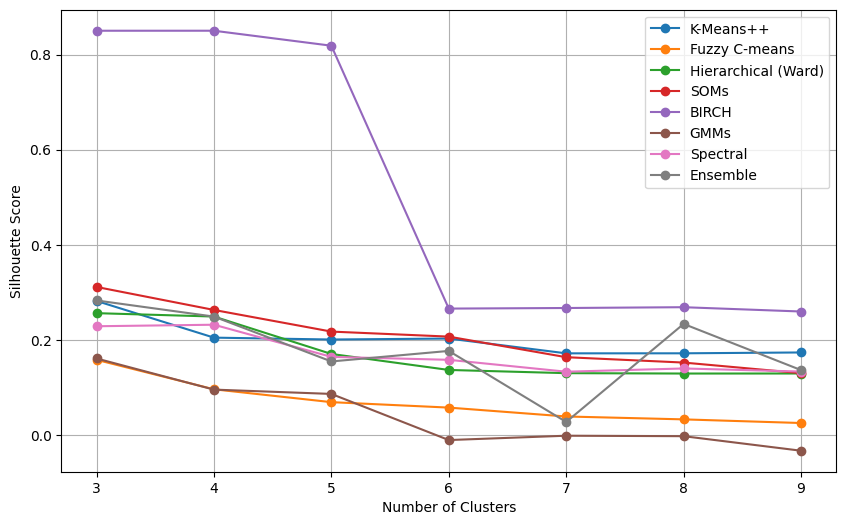

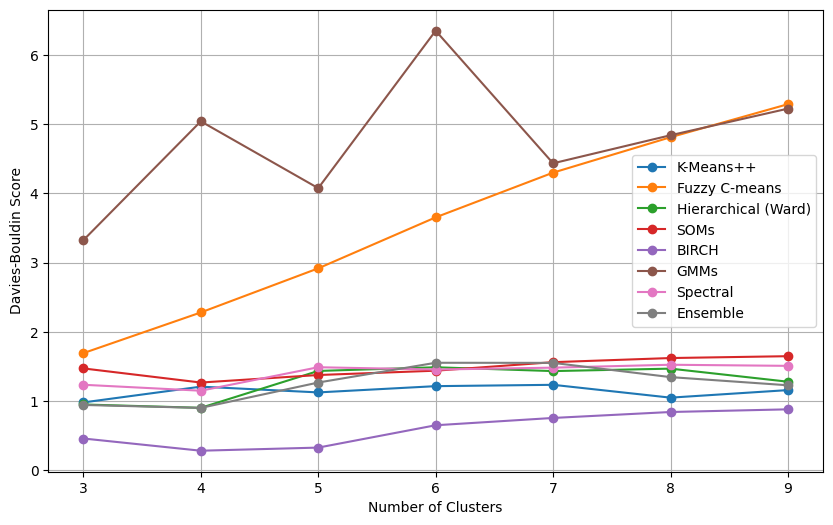

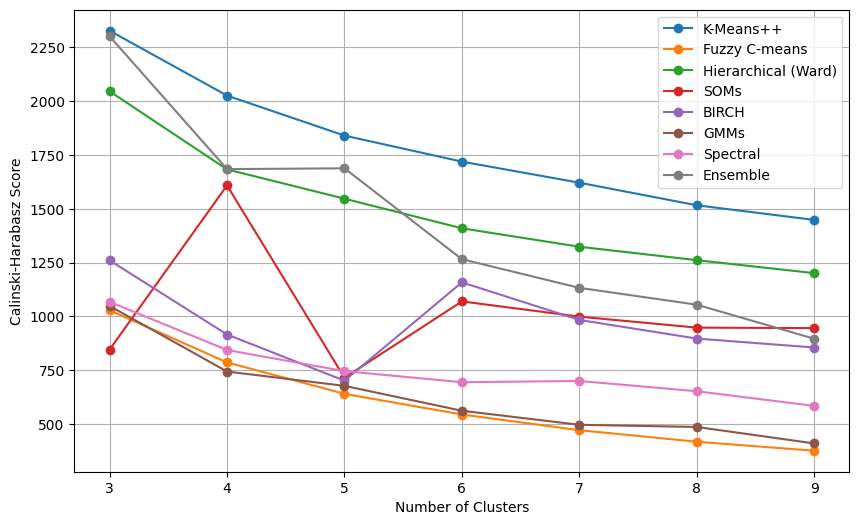

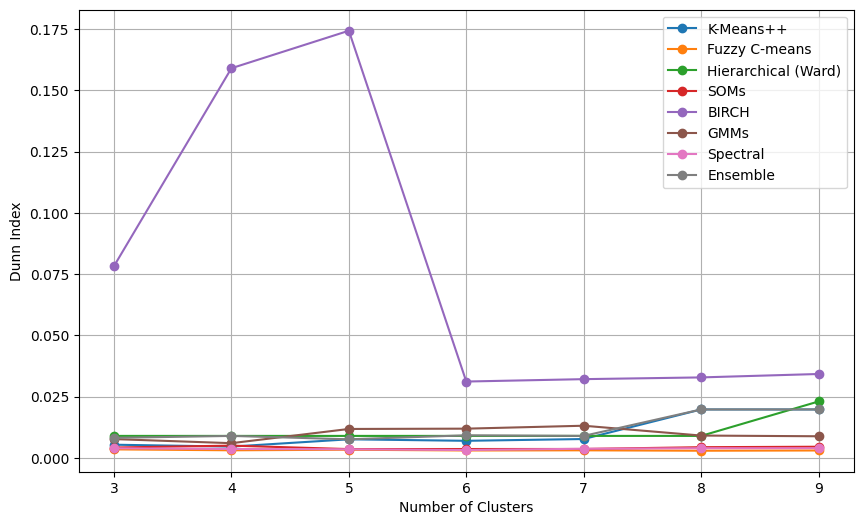

In [142]:
import matplotlib.pyplot as plt

# Define the metrics you want to plot
metrics = ["Silhouette Score", "Davies-Bouldin Score", "Calinski-Harabasz Score", "Dunn Index"]

# Dictionary mapping each algorithm name to its metrics DataFrame
algos_metrics = {
    "K-Means++": metrics_kmeanspp_df,
    "Fuzzy C-means": metrics_fuzzycmeans_df,
    "Hierarchical (Ward)": metrics_hierarchical_ward_df,
    "SOMs": metrics_som_df,
    "BIRCH": metrics_birch_df,
    "GMMs": metrics_gmm_df,
    "Spectral": metrics_spectral_df,
    "Ensemble": ensemble_metrics_df
}

# Loop through each metric and plot
for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Check if the metric exists in the DataFrame before plotting
    for algo_name, metrics_df in algos_metrics.items():
        if metric in metrics_df.columns:
            plt.plot(metrics_df["Number of Clusters"], metrics_df[metric], marker='o', linestyle='-', label=algo_name)

    #plt.title(f'{metric} vs Number of Clusters for Different Algorithms')
    plt.xlabel('Number of Clusters')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

## ANALYSIS OF **CLUSTERS using K-means**

In [143]:
sampled2013copy_df = sampled2013copy_df.reset_index()

In [144]:
# Dropping rows with missing values in the 'KWH/hh (per half hour) ' column
sampled2013copy_df= sampled2013copy_df.dropna(subset=['KWH/hh (per half hour) '])

In [145]:
# Make an explicit copy after subsetting
filtered_sampled2013copy_df = sampled2013copy_df[sampled2013copy_df['LCLid'].isin(features_df.index)].copy()

# Convert the 'DateTime' column to a datetime datatype
filtered_sampled2013copy_df['DateTime'] = pd.to_datetime(filtered_sampled2013copy_df['DateTime'])

# Extract the time slot
filtered_sampled2013copy_df['time_slot'] = filtered_sampled2013copy_df['DateTime'].dt.time

# Ensure that the consumption column is numeric
filtered_sampled2013copy_df['KWH/hh (per half hour) '] = pd.to_numeric(filtered_sampled2013copy_df['KWH/hh (per half hour) '], errors='coerce')

In [163]:
# Group by 'LCLid' and 'time_slot' and calculate the mean consumption
grouped_df = filtered_sampled2013copy_df.groupby(['LCLid', 'time_slot']).agg(avg_consumption=('KWH/hh (per half hour) ', 'median')).reset_index()

# Pivot the dataframe
load_shape_df = grouped_df.pivot(index='LCLid', columns='time_slot', values='avg_consumption')

# Create a DataFrame from labels_kmeans with households as the index
df_with_labels_kmeanspp = pd.DataFrame(labels_kmeanspp[9], index=scaled_df.index, columns=['ClusterID'])

# Merge it with load_shape_df on LCLid
load_shape_df = load_shape_df.merge(df_with_labels_kmeanspp, left_index=True, right_index=True)

In [147]:
from sklearn.preprocessing import MinMaxScaler

# Isolate the consumption data without the cluster labels for normalization
consumption_data = load_shape_df.drop('ClusterID', axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the consumption data
normalized_consumption_data = pd.DataFrame(
    scaler.fit_transform(consumption_data),
    index=consumption_data.index,
    columns=consumption_data.columns
)

# Add the cluster labels back to the normalized consumption data
normalized_load_shape_df = normalized_consumption_data.merge(
    load_shape_df['ClusterID'],
    left_index=True,
    right_index=True
)

Cluster_sizes

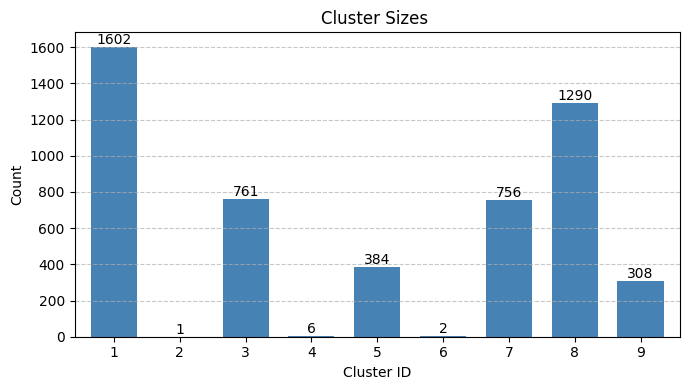

In [165]:
load_shape_df['ClusterID'] += 1

# Count the number of households in each cluster
cluster_counts = load_shape_df['ClusterID'].value_counts()

plt.figure(figsize=(7, 4))
ax = cluster_counts.sort_index().plot(kind='bar', color='steelblue', width=0.7)
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.title('Cluster Sizes ')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Load shape Analysis

In [166]:
normalized_load_shape_df=load_shape_df

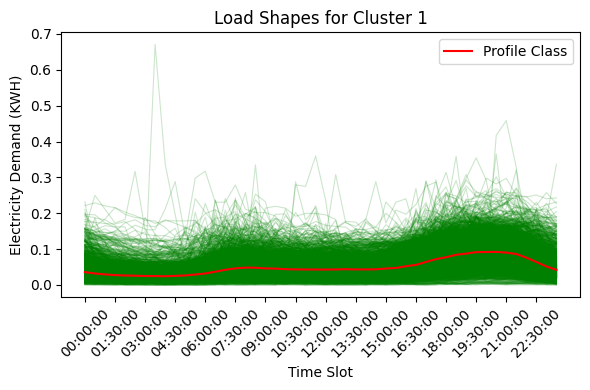

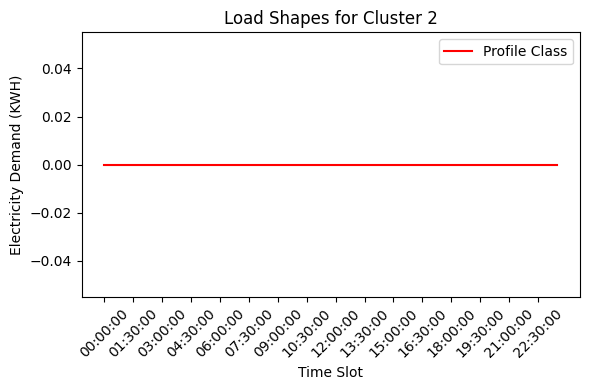

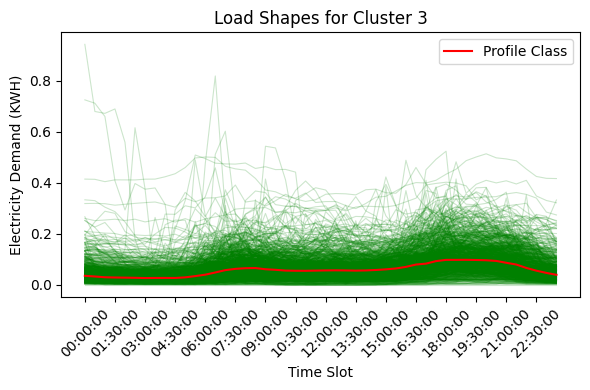

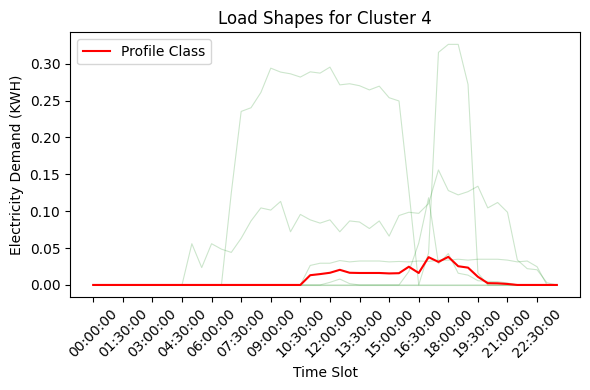

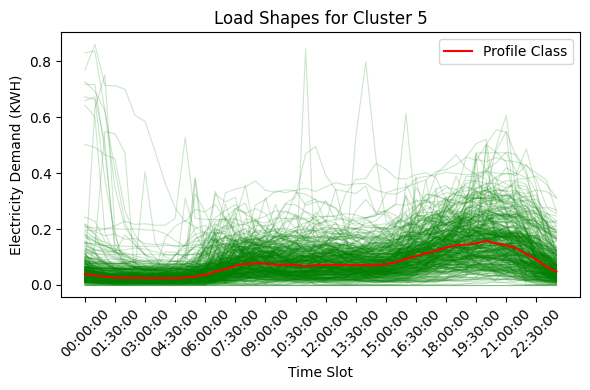

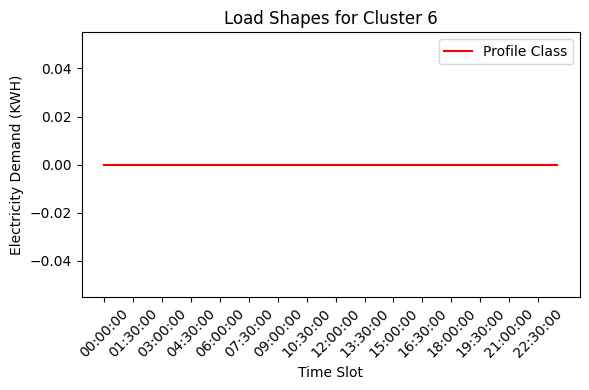

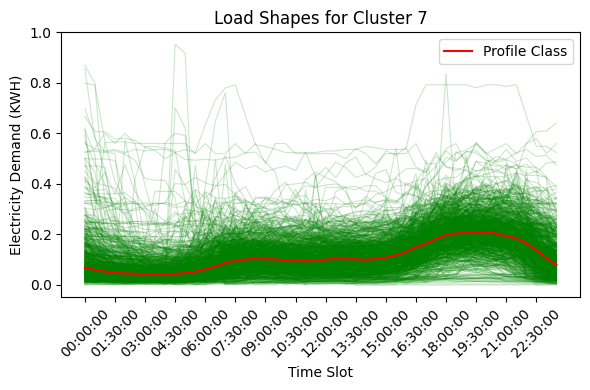

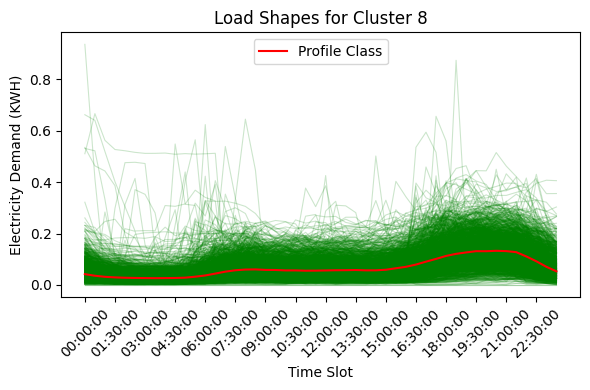

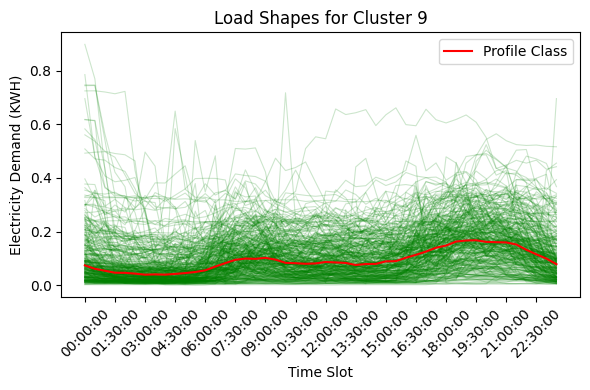

In [168]:
# Get unique clusters and sort them
clusters = sorted(normalized_load_shape_df['ClusterID'].unique())

# For each cluster
for cluster in clusters:
    plt.figure(figsize=(6, 4))

    # Subset dataframe for a specific cluster
    cluster_data = normalized_load_shape_df[normalized_load_shape_df['ClusterID'] == cluster]

    # Drop ClusterID column for plotting
    cluster_data = cluster_data.drop(columns='ClusterID')

    # Calculate mean for each time slot within the cluster
    cluster_mean = cluster_data.median(axis=0)

    # Plot each household's load shape in the cluster
    for index, row in cluster_data.iterrows():
        time_slots = [str(t) for t in row.index]
        plt.plot(time_slots, row.values, color='green', alpha=0.2, linewidth=0.8)

    # Plot the mean electricity demand for the cluster in black
    plt.plot(time_slots, cluster_mean, color='red', linewidth=1.5, label='Profile Class')

    plt.title(f'Load Shapes for Cluster {cluster}')
    plt.xlabel('Time Slot')
    plt.ylabel('Electricity Demand (KWH)')
    plt.xticks(time_slots[::3], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

StopIteration: 

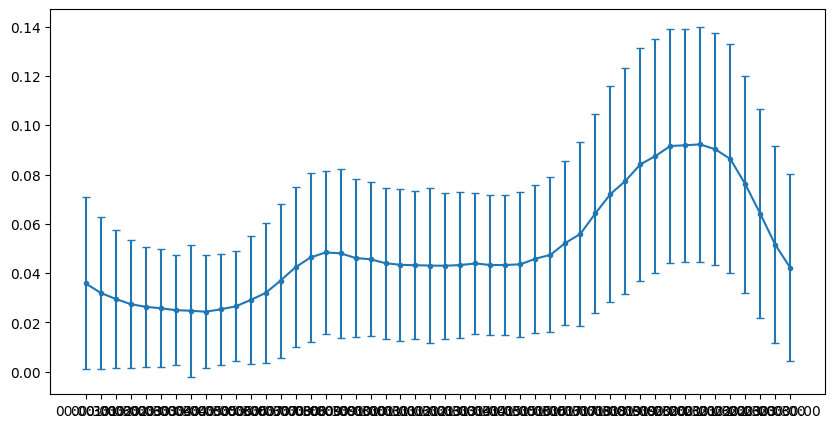

In [170]:
# Group by 'ClusterID' and compute the mean for each time slot
cluster_centroids =normalized_load_shape_df.groupby('ClusterID').median()

# Convert time slots into strings
time_slots_str = [str(ts) for ts in cluster_centroids.columns]

# Compute standard deviation grouped by ClusterID
cluster_std = normalized_load_shape_df.groupby('ClusterID').std()

# Set a color palette for the clusters
colors = sns.color_palette('tab10', len(cluster_centroids.index))

# Set a compact figure size
plt.figure(figsize=(10, 5))

# Set a color palette for the clusters
colors = sns.color_palette('tab10', len(cluster_centroids.index))

# Plot each cluster's centroid with standard deviation as error bars
for idx, cluster in enumerate(cluster_centroids.index):
    plt.errorbar(time_slots_str, cluster_centroids.loc[cluster],
                 yerr=cluster_std.loc[cluster],
                 label=f'Cluster {cluster}',
                 color=colors[idx],
                 capsize=3,
                 linestyle='-',
                 marker='o',
                 markersize=3)

plt.title('Cluster Centroids with error bars')
plt.xlabel('Time Slot')
plt.ylabel('Average Consumption')
plt.xticks(time_slots_str[::2])  # Display every 2nd time slot (whole hours)
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Removing outliers for a more representative Profile Class

In [171]:
# Initialize an empty DataFrame to hold the filtered data
filtered_load_shape_df = pd.DataFrame()
outliers_df = pd.DataFrame()

# For each cluster, remove outliers based on IQR
for cluster_id in normalized_load_shape_df['ClusterID'].unique():
    # Select cluster data
    cluster_data = normalized_load_shape_df[normalized_load_shape_df['ClusterID'] == cluster_id].copy()

    # Drop the 'ClusterID' column for computing IQR
    cluster_consumption_data = cluster_data.drop('ClusterID', axis=1)

    # Calculate Q1, Q3, and IQR
    Q1 = cluster_consumption_data.quantile(0.25)
    Q3 = cluster_consumption_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine outliers
    is_outlier = ~((cluster_consumption_data >= lower_bound) & (cluster_consumption_data <= upper_bound)).all(axis=1)

    # Filter out outliers and non-outliers
    filtered_cluster_data = cluster_data[~is_outlier]
    cluster_outliers = cluster_data[is_outlier]

    # Append the filtered data to the main DataFrame
    filtered_load_shape_df = pd.concat([filtered_load_shape_df, filtered_cluster_data])

    # Append the outliers to the outliers DataFrame
    outliers_df = pd.concat([outliers_df, cluster_outliers])

# Reset index to make 'LCLid' a column again if it was the index
filtered_load_shape_df.reset_index(inplace=True)
outliers_df.reset_index(inplace=True)

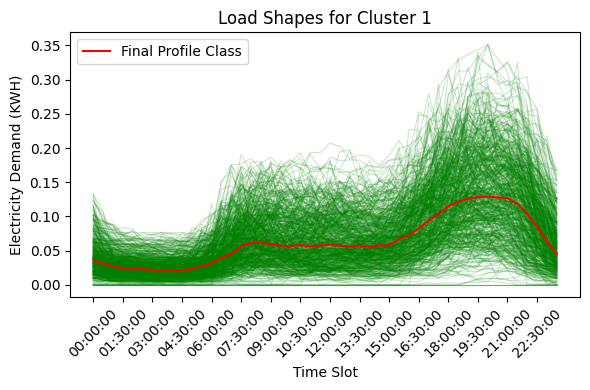

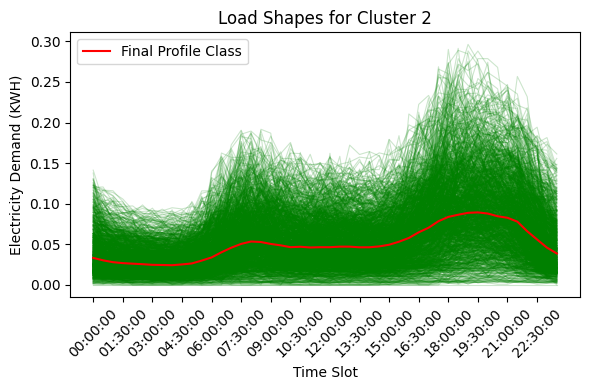

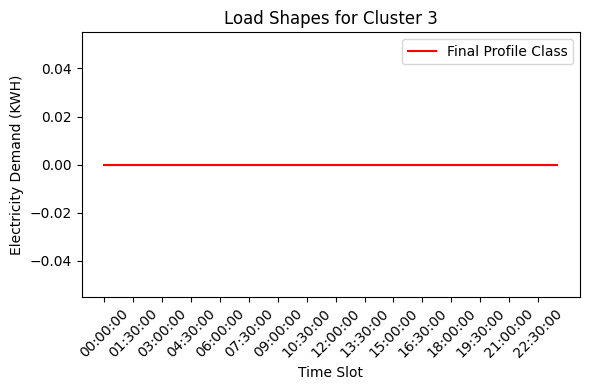

In [158]:
# Assuming 'filtered_load_shape_df' is your DataFrame
filtered_load_shape_df = filtered_load_shape_df.set_index('LCLid')

# Get unique clusters and sort them
clusters = sorted(filtered_load_shape_df['ClusterID'].unique())

# For each cluster
for cluster in clusters:
    plt.figure(figsize=(6, 4))

    # Subset dataframe for a specific cluster
    cluster_data = filtered_load_shape_df[filtered_load_shape_df['ClusterID'] == cluster]

    # Drop ClusterID column for plotting
    cluster_data = cluster_data.drop(columns='ClusterID')

    # Calculate mean for each time slot within the cluster
    cluster_mean = cluster_data.median(axis=0)

    # Plot each household's load shape in the cluster
    for index, row in cluster_data.iterrows():
        time_slots = [str(t) for t in row.index]
        plt.plot(time_slots, row.values, color='green', alpha=0.2, linewidth=0.8)

    # Plot the mean electricity demand for the cluster in black
    plt.plot(time_slots, cluster_mean, color='red', linewidth=1.5, label='Final Profile Class')

    plt.title(f'Load Shapes for Cluster {cluster}')
    plt.xlabel('Time Slot')
    plt.ylabel('Electricity Demand (KWH)')
    plt.xticks(time_slots[::3], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [172]:
# Group by 'ClusterID' and compute the mean for each time slot
cluster_centroids = filtered_load_shape_df.groupby('ClusterID').median()

# Convert time slots into strings
time_slots_str = [str(ts) for ts in cluster_centroids.columns]

# Compute standard deviation grouped by ClusterID
cluster_std = filtered_load_shape_df.groupby('ClusterID').std()

# Set a color palette for the clusters
colors = sns.color_palette('tab10', len(cluster_centroids.index))

# Set a compact figure size
plt.figure(figsize=(10, 5))

# Set a color palette for the clusters
colors = sns.color_palette('tab10', len(cluster_centroids.index))

# Plot each cluster's centroid with standard deviation as error bars
for idx, cluster in enumerate(cluster_centroids.index):
    plt.errorbar(time_slots_str, cluster_centroids.loc[cluster],
                 yerr=cluster_std.loc[cluster],
                 label=f'Cluster {cluster}',
                 color=colors[idx],
                 capsize=3,
                 linestyle='-',
                 marker='o',
                 markersize=3)

plt.title('Cluster Centroids with error bars')
plt.xlabel('Time Slot')
plt.ylabel('Average Consumption')
plt.xticks(time_slots_str[::2])  # Display every 2nd time slot (whole hours)
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<ipython-input-172-42d5222dd015>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_centroids = filtered_load_shape_df.groupby('ClusterID').median()
<ipython-input-172-42d5222dd015>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_std = filtered_load_shape_df.groupby('ClusterID').std()


StopIteration: 

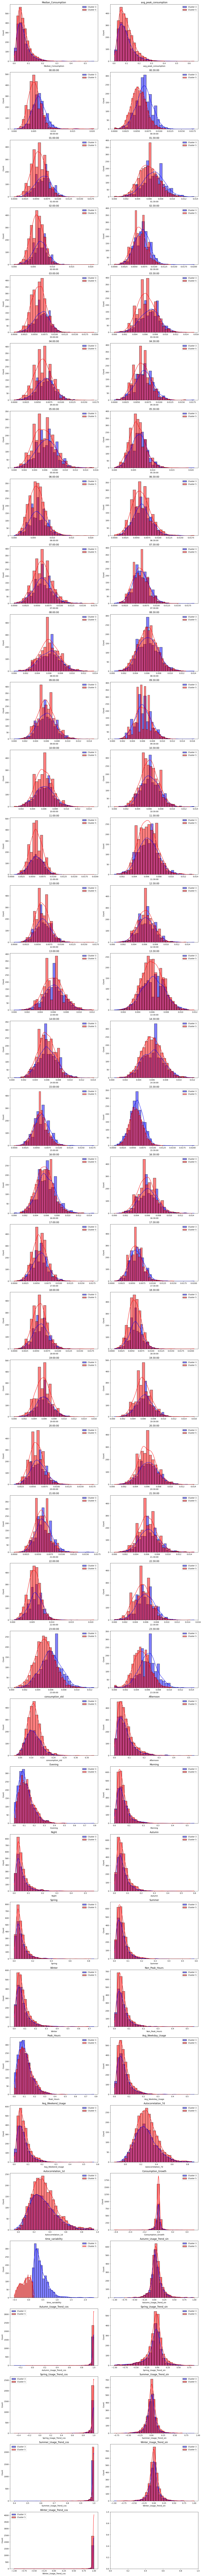

In [160]:
merged_df = features_df.merge(df_with_labels_kmeanspp, left_index=True, right_index=True)

# Filter for clusters 1 and 3
cluster_1 = merged_df[merged_df['ClusterID'] == 1]
cluster_3 = merged_df[merged_df['ClusterID'] == 3]

# Set up the matplotlib figure
n_features = len(scaled_df.columns)
n_rows = (n_features + 1) // 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Iterate over each feature to create a plot
for i, feature in enumerate(scaled_df.columns):
    ax = axes[i]
    sns.histplot(cluster_1[feature], bins=30, kde=True, color='blue', ax=ax, label='Cluster 3')
    sns.histplot(cluster_3[feature], bins=30, kde=True, color='red', ax=ax, label='Cluster 5')
    ax.set_title(feature)
    ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

Seasonal analysis

In [161]:
filtered_sampled2013copy_df = filtered_sampled2013copy_df.set_index('LCLid')

# Merge filtered_sampled2013copy_df with df_with_labels_kmeanspp on 'LCLid'
seasonal_analysis_df  = filtered_sampled2013copy_df.merge(df_with_labels_kmeanspp, left_index=True, right_index=True)

# Filter out the outliers from weeknd_df using the LCLid's from outliers_df
seasonal_analysis_df = seasonal_analysis_df [~seasonal_analysis_df.index.isin(outliers_df['LCLid'])]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the consumption column for normalization
# We reshape it to (-1, 1) because the scaler requires a 2D array
consumption_values = seasonal_analysis_df['KWH/hh (per half hour) '].values.reshape(-1, 1)

# Fit and transform the consumption data
seasonal_analysis_df['KWH/hh (per half hour) '] = scaler.fit_transform(consumption_values)

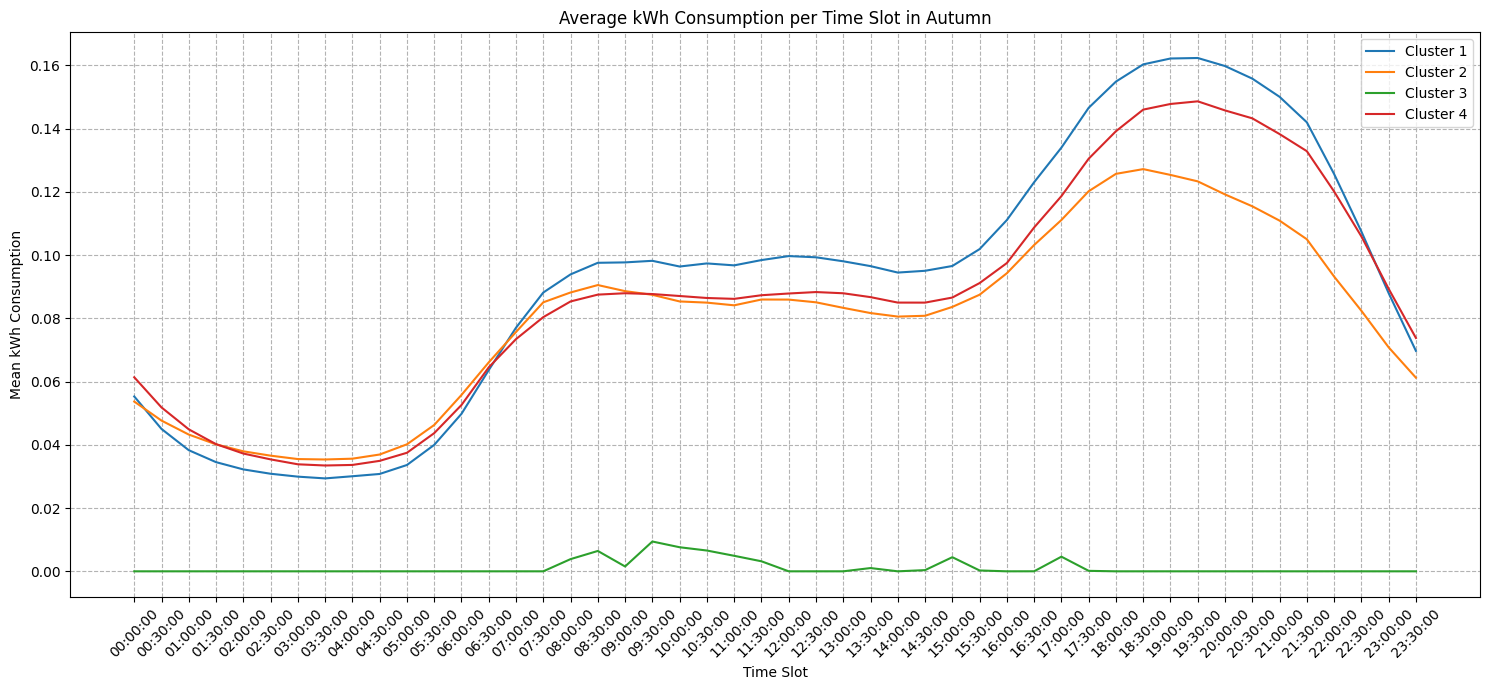

In [162]:
import datetime

# Filter for each season
autumn_df = seasonal_analysis_df[seasonal_analysis_df['Season'] == 'Autumn']
winter_df = seasonal_analysis_df[seasonal_analysis_df['Season'] == 'Winter']
spring_df = seasonal_analysis_df[seasonal_analysis_df['Season'] == 'Spring']
summer_df = seasonal_analysis_df[seasonal_analysis_df['Season'] == 'Summer']

# 1.
def get_mean_and_std_consumption(df):
    return df.groupby(['ClusterID', 'time_slot']).agg(mean_consumption=('KWH/hh (per half hour) ', 'mean'),
                                                      std_consumption=('KWH/hh (per half hour) ', 'std')).reset_index()

autumn_stats_df = get_mean_and_std_consumption(autumn_df)
winter_stats_df = get_mean_and_std_consumption(winter_df)
spring_stats_df = get_mean_and_std_consumption(spring_df)
summer_stats_df = get_mean_and_std_consumption(summer_df)

def plot_seasonal_mean(df, season):
    plt.figure(figsize=(15, 7))

    # Convert 'time_slot' column to string for plotting
    df['time_slot_str'] = df['time_slot'].astype(str)

    for cluster_id in df['ClusterID'].unique():
        cluster_data = df[df['ClusterID'] == cluster_id]

        # Plot mean consumption
        plt.plot(cluster_data['time_slot_str'], cluster_data['mean_consumption'], label=f'Cluster {cluster_id+1}')

    plt.title(f'Average kWh Consumption per Time Slot in {season}')
    plt.xlabel('Time Slot')
    plt.ylabel('Mean kWh Consumption')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_seasonal_mean(autumn_stats_df, "Autumn")

In [ ]:
plot_seasonal_mean(winter_stats_df, "Winter")

In [ ]:
plot_seasonal_mean(spring_stats_df, "Spring")

In [ ]:
plot_seasonal_mean(summer_stats_df, "Summer")

In [ ]:
def plot_all_seasons_in_one_diagram(cluster_id):
    plt.figure(figsize=(12, 6))

    # Seasonal DataFrames for plotting and a color map
    seasonal_dfs = [(autumn_stats_df, "Autumn", 'orange'),
                    (winter_stats_df, "Winter", 'blue'),
                    (spring_stats_df, "Spring", 'green'),
                    (summer_stats_df, "Summer", 'red')]

    for df, season, color in seasonal_dfs:
        cluster_data = df[df['ClusterID'] == cluster_id].copy()

        # Convert 'time_slot' column to string for plotting
        cluster_data['time_slot_str'] = cluster_data['time_slot'].astype(str)

        # Plot without rearranging the 'before 5am' data
        plt.plot(cluster_data['time_slot_str'], cluster_data['mean_consumption'], label=season, color=color)

    plt.title(f'Cluster {cluster_id+1} Average kWh Consumption per Time Slot Across Seasons')
    plt.xlabel('Time Slot')
    plt.ylabel('Mean kWh Consumption')
    plt.legend()
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Example usage:
# To plot data for Cluster 1
plot_all_seasons_in_one_diagram(0)

In [ ]:
plot_all_seasons_in_one_diagram(1)

In [ ]:
plot_all_seasons_in_one_diagram(2)

In [ ]:
plot_all_seasons_in_one_diagram(3)

Weekday vs Weeknd analysis

In [ ]:
#filtered_sampled2013copy_df = filtered_sampled2013copy_df.set_index('LCLid')
weeknd_df  = filtered_sampled2013copy_df.merge(df_with_labels_kmeanspp, left_index=True, right_index=True)

# Filter out the outliers from weeknd_df using the LCLid's from outliers_df
weeknd_df = weeknd_df[~weeknd_df.index.isin(outliers_df['LCLid'])]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the consumption column for normalization
# We reshape it to (-1, 1) because the scaler requires a 2D array
consumption_values = weeknd_df['KWH/hh (per half hour) '].values.reshape(-1, 1)

# Fit and transform the consumption data
weeknd_df['KWH/hh (per half hour) '] = scaler.fit_transform(consumption_values)

In [ ]:
# Group by ClusterID, Weekday status, and time_slot to compute the average consumption
weekend_analysis_df = weeknd_df.groupby(['ClusterID', 'Weekday', 'time_slot']).agg(mean_consumption=('KWH/hh (per half hour) ', 'median')).reset_index()

# Convert time_slot to string for plotting purposes
weekend_analysis_df['time_slot_str'] = weekend_analysis_df['time_slot'].astype(str)

# Number of unique clusters
num_clusters = weekend_analysis_df['ClusterID'].nunique()

# Plotting the results
plt.figure(figsize=(15, 5 * num_clusters))  # Adjusting height based on the number of clusters

for idx, cluster_id in enumerate(sorted(weekend_analysis_df['ClusterID'].unique())):
    cluster_data_weekday = weekend_analysis_df[(weekend_analysis_df['ClusterID'] == cluster_id) & (weekend_analysis_df['Weekday'] == True)]
    cluster_data_weekend = weekend_analysis_df[(weekend_analysis_df['ClusterID'] == cluster_id) & (weekend_analysis_df['Weekday'] == False)]

    plt.subplot(num_clusters, 1, idx + 1)  # Adjusting for 1-based indexing
    plt.plot(cluster_data_weekday['time_slot_str'], cluster_data_weekday['mean_consumption'], label='Weekday', color='blue')
    plt.plot(cluster_data_weekend['time_slot_str'], cluster_data_weekend['mean_consumption'], label='Weekend', color='red')
    plt.title(f'Cluster {cluster_id+1} - Weekday vs. Weekend Consumption')
    plt.xlabel('Time Slot')
    plt.ylabel('Mean kWh Consumption')
    plt.legend()
    plt.xticks(cluster_data_weekday['time_slot_str'][::3], rotation=90)
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()

plt.show()

## Visualization

In [ ]:
# Assuming you have run the KMeans algorithm for n_clusters=4 already
centroids_6 = centroids_kmeanspp[6]

# Convert centroids into DataFrame for easier plotting
df_centroids = pd.DataFrame(centroids_6, columns=scaled_df.columns)

# Columns to drop
cols_to_drop = [
    "00:00:00", "00:30:00", "01:00:00", "01:30:00", "02:00:00", "02:30:00",
    "03:00:00", "03:30:00", "04:00:00", "04:30:00", "05:00:00", "05:30:00",
    "06:00:00", "06:30:00", "07:00:00", "07:30:00", "08:00:00", "08:30:00",
    "09:00:00", "09:30:00", "10:00:00", "10:30:00", "11:00:00", "11:30:00",
    "12:00:00", "12:30:00", "13:00:00", "13:30:00", "14:00:00", "14:30:00",
    "15:00:00", "15:30:00", "16:00:00", "16:30:00", "17:00:00", "17:30:00",
    "18:00:00", "18:30:00", "19:00:00", "19:30:00", "20:00:00", "20:30:00",
    "21:00:00", "21:30:00", "22:00:00", "22:30:00", "23:00:00", "23:30:00"
]

# Drop the unwanted columns
df_centroids_filtered = df_centroids.drop(columns=cols_to_drop)

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df_centroids_filtered.T, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Centroid Value'})
plt.title('Cluster Centroids Heatmap for n_clusters=6')
plt.xlabel('Cluster ID')
plt.ylabel('Feature')
plt.show()

In [ ]:
pip install shap

In [ ]:
# Columns to drop
cols_to_drop = [
    "00:00:00", "00:30:00", "01:00:00", "01:30:00", "02:00:00", "02:30:00",
    "03:00:00", "03:30:00", "04:00:00", "04:30:00", "05:00:00", "05:30:00",
    "06:00:00", "06:30:00", "07:00:00", "07:30:00", "08:00:00", "08:30:00",
    "09:00:00", "09:30:00", "10:00:00", "10:30:00", "11:00:00", "11:30:00",
    "12:00:00", "12:30:00", "13:00:00", "13:30:00", "14:00:00", "14:30:00",
    "15:00:00", "15:30:00", "16:00:00", "16:30:00", "17:00:00", "17:30:00",
    "18:00:00", "18:30:00", "19:00:00", "19:30:00", "20:00:00", "20:30:00",
    "21:00:00", "21:30:00", "22:00:00", "22:30:00", "23:00:00", "23:30:00"
]
# Drop the unwanted columns
scaled_df =scaled_df.drop(columns=cols_to_drop)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import shap

y = labels_kmeanspp[6]
clf = RandomForestClassifier()
clf.fit(scaled_df, y)

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(scaled_df)

# Since this is multiclass, shap_values will be a list.
# Display summary plots for each cluster/class:
for i in range(len(shap_values)):
    print(f"SHAP Summary Plot for Cluster {i+1}")
    shap.summary_plot(shap_values[i], scaled_df, title=f"Cluster {i+1} SHAP Values")